<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/10_Series_Tiempo_Cap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **8 Contabilización de la estacionalidad**
### **Este capítulo cubre**
+ Examinando el modelo de media móvil integrada autorregresiva estacional, $SARIMA(p,d,q)(P,D,Q)_m$
+ Análisis de patrones estacionales en una serie temporal.
+ Predicción utilizando el modelo $SARIMA(p,d,q)(P,D,Q)_m$

## **Introducción**
+ En el capítulo anterior, cubrimos el modelo de media móvil integrada autorregresiva, $ARIMA(p,d,q)$, que nos permite modelar series de tiempo no estacionarias.
+ Ahora agregaremos otra capa de complejidad al modelo ARIMA para incluir patrones estacionales en series de tiempo, lo que nos llevará al modelo **SARIMA**.
+ **El modelo de media móvil integrada autorregresiva estacional (SARIMA)**, o $SARIMA(p,d,q)(P,D,Q)_m$, agrega otro conjunto de parámetros que nos permite tener en cuenta patrones periódicos al pronosticar una serie de tiempo, lo que no siempre es posible con un modelo $ARIMA(p,d,q)$.
+ En este capítulo, examinaremos el modelo $SARIMA(p,d,q)(P,D,Q)_m$ y adaptaremos nuestro procedimiento de modelado general para tener en cuenta los nuevos parámetros.
+ También determinaremos cómo identificar patrones estacionales en una serie de tiempo y aplicaremos el modelo SARIMA para pronosticar una serie de tiempo estacional.
+ **Específicamente, aplicaremos el modelo para pronosticar el número total de pasajeros mensuales de una aerolínea. Los datos se registraron desde enero de 1949 hasta diciembre de 1960. La serie se muestra en la figura 8.1.**

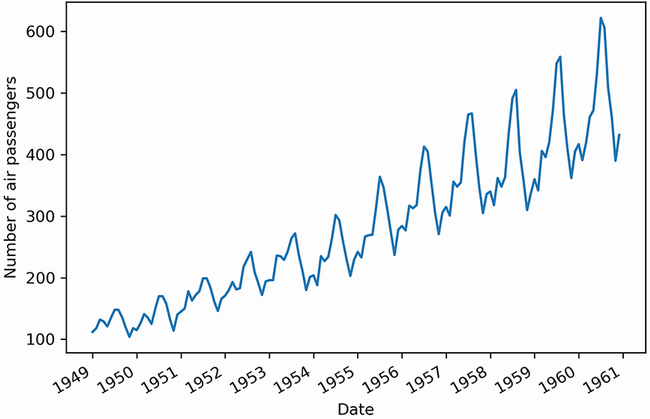

+ **Figura 8.1 Número total mensual de pasajeros aéreos de una aerolínea, desde enero de 1949 hasta diciembre de 1960. Notará un patrón estacional claro en la serie, con un tráfico máximo a mediados de cada año.**

### **Lo que se observa en la figura**
+ En la figura 8.1 podemos ver **un claro patrón estacional en la serie**.
+ El número de pasajeros aéreos es menor a principios y finales de año, y aumenta durante los meses de junio, julio y agosto.
+ Nuestro objetivo es pronosticar el número de pasajeros aéreos mensuales para un año.
+ Es importante que una compañía aérea pronostique el número de pasajeros aéreos para poder fijar mejores precios para sus billetes y programar vuelos para satisfacer la demanda de un mes determinado.

## **8.1. Examen del modelo** $$SARIMA(p,d,q)(P,D,Q)_m$$

+ El modelo $SARIMA(p,d,q)(P,D,Q)_m$ amplía el *modelo ARIMA(p,d,q)* del capítulo anterior al agregar *parámetros estacionales*.
+ Notará cuatro parámetros nuevos en el modelo: *P, D, Q y m*.
+ Los primeros tres tienen el mismo significado que en el modelo *ARIMA(p,d,q)*, pero son sus contrapartes estacionales.
+ Para comprender el significado de estos parámetros y cómo afectan el modelo final, primero debemos definir *m*.
+ El parámetro *m* representa la frecuencia.
+ En el contexto de una serie temporal, *la frecuencia se define como el número de observaciones por ciclo*.
+ La duración del ciclo dependerá del conjunto de datos.
+ *Para los datos que se registraron cada año, trimestre, mes o semana, se considera que la duración de un ciclo es de 1 año.*
+ Si los datos se registraron anualmente, *m = 1*, ya que solo hay una observación por año.
+ Si los datos se registraron trimestralmente, *m = 4*, ya que hay cuatro trimestres en un año y, por lo tanto, cuatro observaciones por año.
+ Por supuesto, si los datos se registraron mensualmente, *m = 12*.
+ Finalmente, para los datos semanales, *m = 52*.
+ **La Tabla 8.1 indica el valor apropiado de m según la frecuencia con la que se recopilaron los datos.**

|Datos|frecuencia ($m$)|
|:---|:---:|
|Anual|1|
|Trimestral|4|
|Mensual|12|
|Semanal|52|

+ Cuando los datos se recopilan diariamente o subdiariamente, existen múltiples formas de interpretar la frecuencia.
+ Por ejemplo, los datos diarios pueden tener una estacionalidad semanal. + En ese caso, la frecuencia es *m = 7* porque habría siete observaciones en un ciclo completo de 1 semana.
+ También podría tener una estacionalidad anual, lo que significa que *m = 365*.
+ Por lo tanto, puede ver que los datos diarios y subdiarios pueden tener una longitud de ciclo diferente y, por lo tanto, una frecuencia *m* diferente.
+ La Tabla 8.2 proporciona el valor apropiado de *m* según el ciclo estacional para los datos diarios y subdiarios.

| Colección| Minuto|Hora|Dia|Semana|Año|
|:---:|:---:|:---:|:---:|:---:|:---:|
|Diariamente|--|--|--|7|365|
|Por Horas|--|--|24|168|8766|
|Cada minuto |--|60|1440|10080|525960|
|Cada segundo |60|3600|86400 |604800|31557600|


+ Ahora que comprende el parámetro *m*, los significados de *P, D y Q* se vuelven intuitivos.
+ Como se mencionó anteriormente, son las contrapartes estacionales de los parámetros *p, d y q* que conoce del modelo *ARIMA(p,d,q)*.


## **Acerca del Modelo de media móvil integrada autorregresiva estacional (SARIMA)**
+ El modelo de media móvil integrada autorregresiva estacional (SARIMA) agrega parámetros estacionales al modelo ARIMA(p,d,q).
+ Se denota como $SARIMA(p,d,q)(P,D,Q)_m$, donde:
  +  *P* es el orden del proceso AR(P) estacional,
  +  *D* es el orden estacional de integración,
  +  *Q* es el orden del proceso MA(Q) estacional y
  +  *m* es la frecuencia o la cantidad de observaciones por ciclo estacional.
+ Tenga en cuenta que un modelo $SARIMA(p,d,q)(0,0,0)_m=ARIMA(p,d,q)$

### **Como interpretar los parametros de $SARIMA(p,d,q)(P,D,Q)_m$**
+ Consideremos un ejemplo donde $m = 12$.
+ Si $P = 2$, esto significa que estamos incluyendo dos valores pasados ​​de la serie con un desfase que es un múltiplo de m.
+ Por lo tanto, incluiremos los valores en $y_{t –12}$ y $y_{t –24}$.
+ De manera similar, si $D = 1$, esto significa que ***una diferencia estacional hace que la serie sea estacionaria.***
+ En este caso, una diferencia estacional se expresaría como la ecuación 8.1.
+ **Ecuación 8.1**
$$y'_t = y_t – y_{t –12}$$
+ En una situación donde $Q = 2$, incluiremos términos de error pasados ​​con desfases que sean un múltiplo de m. Por lo tanto, incluiremos los errores $ϵ_{t –12}$ y $ϵ_{t –24}.

### **En el contexto de nuestro ejemlo ilustrativo**
+ *Pongamos esto en perspectiva utilizando el conjunto de datos de pasajeros aéreos mensuales totales de la aerolínea*.
+ *Sabemos que se trata de datos mensuales, lo que significa que $m = 12$.*
+ *Además, podemos ver que los meses de julio y agosto suelen tener los números más altos de pasajeros aéreos en el año, como lo muestran los marcadores redondos en la figura 8.2.*
+ *Por lo tanto, si vamos a pronosticar el mes de julio de 1961, la información proveniente del mes de julio de años anteriores probablemente será útil, ya que podemos esperar intuitivamente que el número de pasajeros aéreos alcance su punto más alto en el mes de julio de 1961.*
+ *Los parámetros P, D, Q y m nos permiten capturar esa información del ciclo estacional anterior para ayudarnos a pronosticar nuestra serie temporal.*

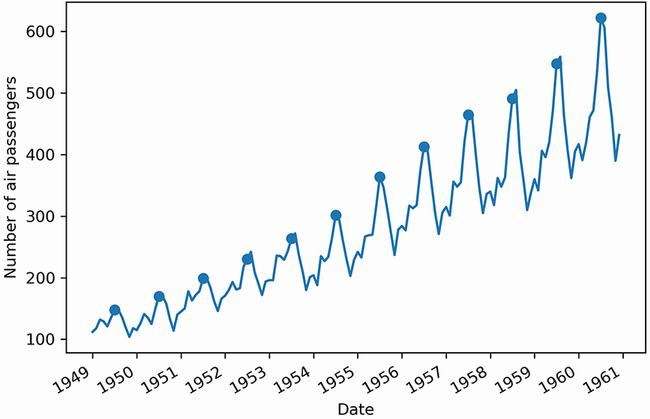

+ **Figura 8.2 Marcando el mes de julio de cada año. Se puede observar como el mes de julio tiene mayor número de pasajeros aéreos. Por lo tanto, tendría sentido que en julio del año siguiente también se registrara el mayor número de pasajeros aéreos del año. Ese tipo de información es capturada por los parámetros estacionales P , D , Q y m del modelo $SARIMA( p , d , q )( P , D , Q )_m$.**

+ **Ahora que hemos examinado el modelo SARIMA y comprendemos cómo amplía el modelo ARIMA, pasemos a identificar la presencia de patrones estacionales en una serie temporal.**

# **8.2. Identificación de patrones estacionales en una serie temporal**
+ Intuitivamente, sabemos que tiene sentido aplicar el modelo SARIMA a datos que presentan un patrón estacional.
+ Por lo tanto, es importante determinar formas de identificar la estacionalidad en series temporales.
+ Por lo general, trazar los datos de la serie temporal es suficiente para observar patrones periódicos.
+ Por ejemplo, al observar el total mensual de pasajeros aéreos en la figura 8.3, es fácil para nosotros identificar un patrón que se repite todos los años, con un alto número de pasajeros registrados durante junio, julio y agosto de cada año, y menos pasajeros en noviembre, diciembre y enero de cada año.

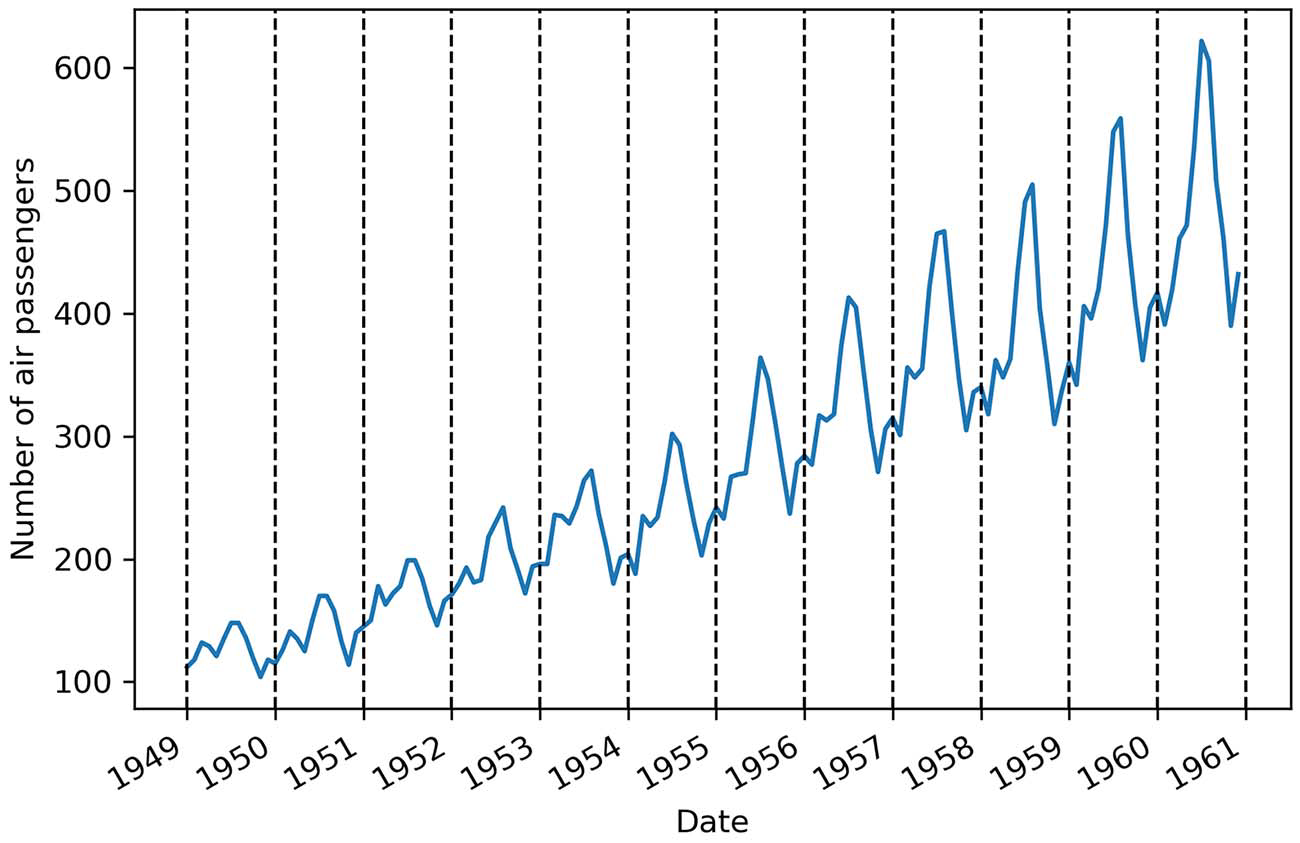

+ **Figura 8.3. Se destaca el patrón estacional en el número mensual de pasajeros aéreos. Las líneas verticales discontinuas separan períodos de doce meses. Podemos ver claramente cómo se produce un pico a mediados de cada año, y hay un patrón muy similar para el comienzo y el final de cada año. Esta observación suele ser suficiente para determinar que el conjunto de datos es estacional.**

## **Descomposición de series temporales**
+ La descomposición de series temporales es una tarea estadística que separa las series temporales en sus tres componentes principales:
  + un componente de tendencia,
  + un componente estacional y
  + los residuos.
+ **El componente de tendencia** representa el cambio a largo plazo en la serie temporal.
+ Este componente es responsable de las series temporales que aumentan o disminuyen con el tiempo.
+ **El componente estacional** es el patrón periódico en la serie temporal.
+ Representa fluctuaciones repetidas que ocurren durante un período fijo de tiempo.
+ Finalmente, **los residuos, o el ruido**, expresan cualquier irregularidad que no se pueda explicar por la tendencia o el componente estacional.


# **8.3. Pronóstico de una serie temporal Estacional**
+ Con la descomposición de series temporales, podemos identificar y visualizar claramente el componente estacional de una serie temporal.
+ Podemos descomponer el conjunto de datos de pasajeros aéreos utilizando la función STL de la biblioteca statsmodels para generar la figura 8.4.

### **8.3.1. Realice el paso a paso con nuestro ejemplo Ilustrativo**
+ **Paso 1. Las librerias de necesarias**
+ **Paso 2. Importar los datos**
+ **Paso 3. Dibuje el proceso estudiado $SARIMA(p,d,q)(P,D,Q)_m$ y observe si existe algun patron estacional**
+ **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**
+ **Paso 5. Si existe algun patron estacional realice la descomponiendo la serie temporal:**
+ **Paso 6. Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**
+ **Paso 7. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**
+ **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**
+ **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**
+ **Paso 8. Construimos todas las combinaciones de parametros del $SARIMA(p,d,q)(P,D,Q)_m$**
+ **Paso 9. El Modelo que nos permitira encontrar los parametros del modelos SARIMA y calcular el AIC**
+ **Paso 10. Separación en conjunto de Prueba y de entrenamiento para la serie original**
+ **Paso 11. Ajustamos todos los modelos SARIMA y calculamos el AIC**
+ **Paso 12. Los residuos se comportan como un ruido blanco - ¿El diagrama Q-Q muestra una línea recta?  - método plot_diagnostics**.
+ **Paso 13. Realice la Prueba de independencia de los residuos- prueba de Ljung-Box y analice los resultados obtenidos**
+**Paso 14. Haga pronósticos sobre el conjunto de prueba. Utilice un método ingenuo y un modelo ARIMA(11,2,3)**
+ **Paso 15. Mida el MSE e identifique su modelo campeón.**
+ **Paso 16. Dibuje los prosticos con los dos métodos empleados**
+ **Paso 17. Dibuje el pronostico con ARIMA(11,2,3)**
+ **Paso 18. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**
+ **Paso 19. Implementando SARIMA - Probaremos nuevamente la estacionariedad**
+ **Paso 20. Implementando SARIMA - Ajustamos todos los modelos SARIMA y calculamos el AIC**
+ **Paso 21. Análisis de los Residuos para el modelo $SARIMA$ - método plot_diagnostics**.
+ **Paso 22. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ **Paso 23. Haga pronósticos sobre el conjunto de prueba. Utilice un método ingenuo y un modelo $SARIMA(2,1,1)(1,1,2)_{12}$**
+ **Paso 24. Construya los graficos de predicción para los tres métos: Ingenuo, $ARIMA(11,2,3)$ y $SARIMA(2,1,1)(1,1,2)_{12}$**
+ **Paso 25. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**

#### **Paso 1. Las librerias de necesarias**

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import sklearn.metrics

In [ ]:
# hacer que los graficos se vean bonitos
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

## **Paso 2. Importando los datos**

In [ ]:
## **Paso 2. Importando los datos**
import pandas as pd

df = pd.read_csv('/content/air-passengers.csv')

df.head() # Muestra las primeras cinco filas de datos.


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
print(len(df))

144


### **Paso 3. Dibuje el proceso estudiado $SARIMA(p,d,q)(P,D,Q)_m$ y observe si existe algun patron estacional**

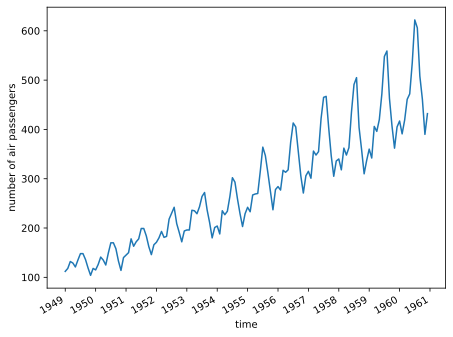

In [ ]:
#**Paso 3. Dibuje el proceso estudiado**
fig, ax = plt.subplots()

ax.plot(df.Passengers)

ax.set_xlabel('time')
ax.set_ylabel('number of air passengers')

ax.set_xticks(
    np.arange(0, 145, 12),
    np.arange(1949, 1962, 1),
)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

+ **Figura 8.1 Número total mensual de pasajeros aéreos de una aerolínea, desde enero de 1949 hasta diciembre de 1960. Notará un patrón estacional claro en la serie, con el tráfico máximo ocurriendo hacia mediados de cada año.**

#### **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**

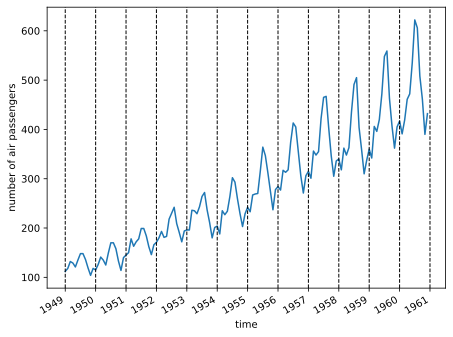

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.Passengers)

ax.set_xlabel('time')
ax.set_ylabel('number of air passengers')

ax.set_xticks(
    np.arange(0, 145, 12),
    np.arange(1949, 1962, 1),
)

# draw line every year
for i in np.arange(0, 145, 12):
    ax.axvline(x = i, linestyle = '--', color = 'black', linewidth = 1)

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 8.3. Se destaca el patrón estacional en el número mensual de pasajeros aéreos. Las líneas verticales discontinuas separan períodos de doce meses. Podemos ver claramente cómo se produce un pico a mediados de cada año, y hay un patrón muy similar para el comienzo y el final de cada año. Esta observación suele ser suficiente para determinar que el conjunto de datos es estacional.**

 ### **Paso 5. Si existe algun patron estacional realice la descomponiendo la serie temporal:**

In [ ]:
# el período es igual a la frecuencia
# STL significa descomposición de tendencia estacional utilizando LOESS.
decomposition = sm.tsa.STL(df.Passengers, period = 12).fit()

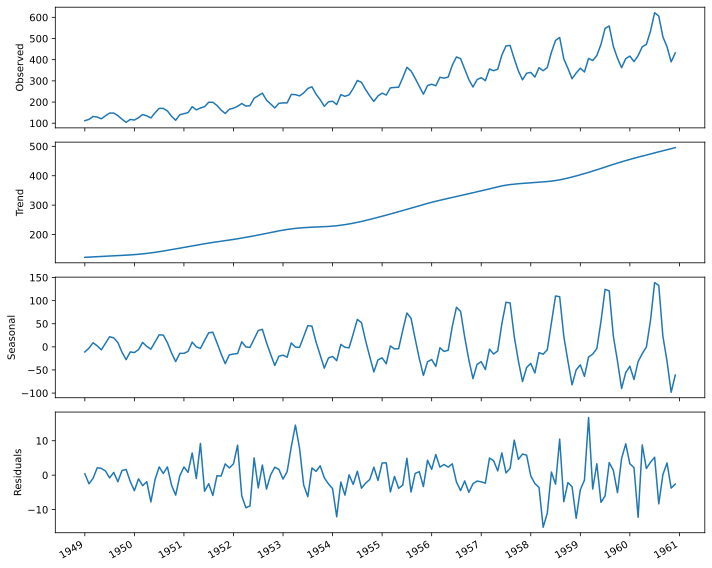

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows = 4, ncols = 1,
    sharex = True,
    figsize=(10,8)
)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))


fig.autofmt_xdate()
plt.tight_layout()

plt.show()

+ **Figura 8.4 Descomposición del conjunto de datos de pasajeros aéreos. El primer gráfico muestra los datos observados. El segundo gráfico muestra el componente de tendencia, que nos indica que el número de pasajeros aéreos aumenta con el tiempo. El tercer gráfico muestra el componente estacional y podemos ver claramente un patrón que se repite a lo largo del tiempo. Por último, el último gráfico muestra los residuos, que son variaciones en los datos que no se pueden explicar mediante la tendencia o el componente estacional.**

### **Acerca de la descomposición de la serie**
+ En la figura 8.4 puede ver cada componente de nuestra serie temporal.
+ Notará que el eje $y$ de los gráficos de los componentes de tendencia, estacionalidad y residuos son ligeramente diferentes de los datos observados.
+ Esto se debe a que cada gráfico muestra la magnitud del cambio que se atribuye a ese componente en particular.
+ De esa manera, la suma de los componentes de tendencia, estacionalidad y residuos da como resultado los datos observados que se muestran en el gráfico superior.
+ Esto explica por qué el componente estacional a veces está en valores negativos y otras veces en valores positivos, ya que crea los picos y valles en los datos observados.

#### **Una serie temporal sin patrón estacional**
+ *En una situación en la que tenemos una serie temporal sin patrón estacional*, el proceso de descomposición mostrará una línea horizontal plana en $0$ para el **componente estacional**.
+ Puede ver cómo la descomposición de series temporales puede ayudarnos a determinar si nuestros datos son estacionales o no.
+ *Este es un método gráfico y no una prueba estadística, pero es suficiente para determinar si una serie es estacional o no, de modo que podamos aplicar el modelo adecuado para realizar pronósticos.*
+ ***De hecho, no existen pruebas estadísticas para identificar la estacionalidad en series temporales.***
+ ***Ahora que ya sabes cómo identificar patrones estacionales en una serie, podemos pasar a adaptar el procedimiento general de modelado para incluir los nuevos parámetros del modelo SARIMA(p,d,q)(P,D,Q)m y pronosticar el número de pasajeros aéreos mensuales.***

#### **Paso 6. Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
### **Prueba de estacionariedad**
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df.Passengers)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={ADF_result[1]} es menor a 0.05')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = 0.8153688792060498 es negativo y
Si valor p =0.991880243437641 es menor a 0.05


## **Acerca del Paso 6**
+ Este bloque de código devuelve una estadística ADF de 0.81 con un valor p de 0.99.
+ Dado que la estadística ADF no es un número negativo grande y el valor p es mayor que 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestra serie no es estacionaria.
+ Necesitamos determinar cuántas veces se debe diferenciar la serie para que se vuelva estacionaria. Esto establecerá el orden de integración d.
+ Podemos aplicar una diferenciación de primer orden y comprobar la estacionariedad.

#### **Paso 7. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**

#### **Diferenciación de primer orden $d=1$**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
passengers_diff = np.diff(df.Passengers, n = 1)

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff = adfuller(passengers_diff)

print(f'ADF Statistic: {ADF_diff[0]}')
print(f'p-value: {ADF_diff[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff[0]} es negativo y')
print(f'Si valor p ={ADF_diff[1]} es menor a 0.05')

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -2.8292668241700047 es negativo y
Si valor p =0.05421329028382478 es menor a 0.05


### **Acerca del Paso 7 y la Diferenciación de primer orden $d=1$**
+ Esto da como resultado una estadística ADF de -2.82 y un valor p de 0.054. Nuevamente, la estadística ADF no es un número negativo grande y el valor p es mayor que 0,05.
+ Por tanto, no podemos rechazar la hipótesis nula y debemos concluir que después de una diferenciación de primer orden, la serie no es estacionaria.

+ **Ahora intentemos diferenciar nuevamente para ver si la serie se vuelve estacionaria.**


#### **Diferenciación de segundo orden $d=2$**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
passengers_diff2 = np.diff(df.Passengers, n = 2)

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff2 = adfuller(passengers_diff2)

print(f'ADF Statistic: {ADF_diff2[0]}')
print(f'p-value: {ADF_diff2[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff2[0]} es negativo y')
print(f'Si valor p ={ADF_diff2[1]} es menor a 0.05')

ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -16.384231542468513 es negativo y
Si valor p =2.7328918500142026e-29 es menor a 0.05


### **Acerca del Paso 7 y la Diferenciación de segundo orden $d=2$**
+ Esto da como resultado un estadístico ADF de -16.38 y un valor p de 0.000.
+ Ahora que tenemos un valor p menor que 0,05 y un estadístico ADF negativo grande, podemos rechazar la hipótesis nula y concluir que nuestra serie es estacionaria.
+ Fueron necesarias dos rondas de diferenciación para que nuestros datos fueran estacionarios, lo que significa que nuestro orden de integración es 2,
por lo que $d = 2$.
+ Antes de pasar a ajustar diferentes combinaciones de modelos ARIMA(p,2,q), debemos separar nuestros datos en conjuntos de prueba y de entrenamiento.
+ Reservaremos el último año de datos para realizar pruebas.

### **Ajustando el Modelo $ARIMA(p,d,q)$ antes de $SARIMA(p,d,q)(P,D,Q)_m$**

+ Ahora podemos definir un rango de valores posibles para los parámetros p y q y ajustar todos los modelos ARIMA(p,d,q) únicos.
+ Elegiremos específicamente un rango de 0 a 12 para permitir que el modelo ARIMA retroceda 12 pasos de tiempo en el tiempo.
+ Dado que los datos se muestrean mensualmente y sabemos que son estacionales, podemos plantear la hipótesis de que la cantidad de pasajeros aéreos en enero de un año determinado probablemente predice la cantidad de pasajeros aéreos en enero del año siguiente.+ Dado que estos dos puntos están separados por 12 pasos de tiempo, permitiremos que los valores de p y q varíen de 0 a 12 para capturar potencialmente esta información estacional en el modelo ARIMA(p,d,q).
+ Finalmente, dado que estamos trabajando con un modelo ARIMA, estableceremos P, D y Q en 0. Observe el uso del parámetro $s$ en el siguiente código, que es equivalente a m.
+ La implementación de SARIMA en statsmodels simplemente usa s en lugar de m; ambos denotan la frecuencia.

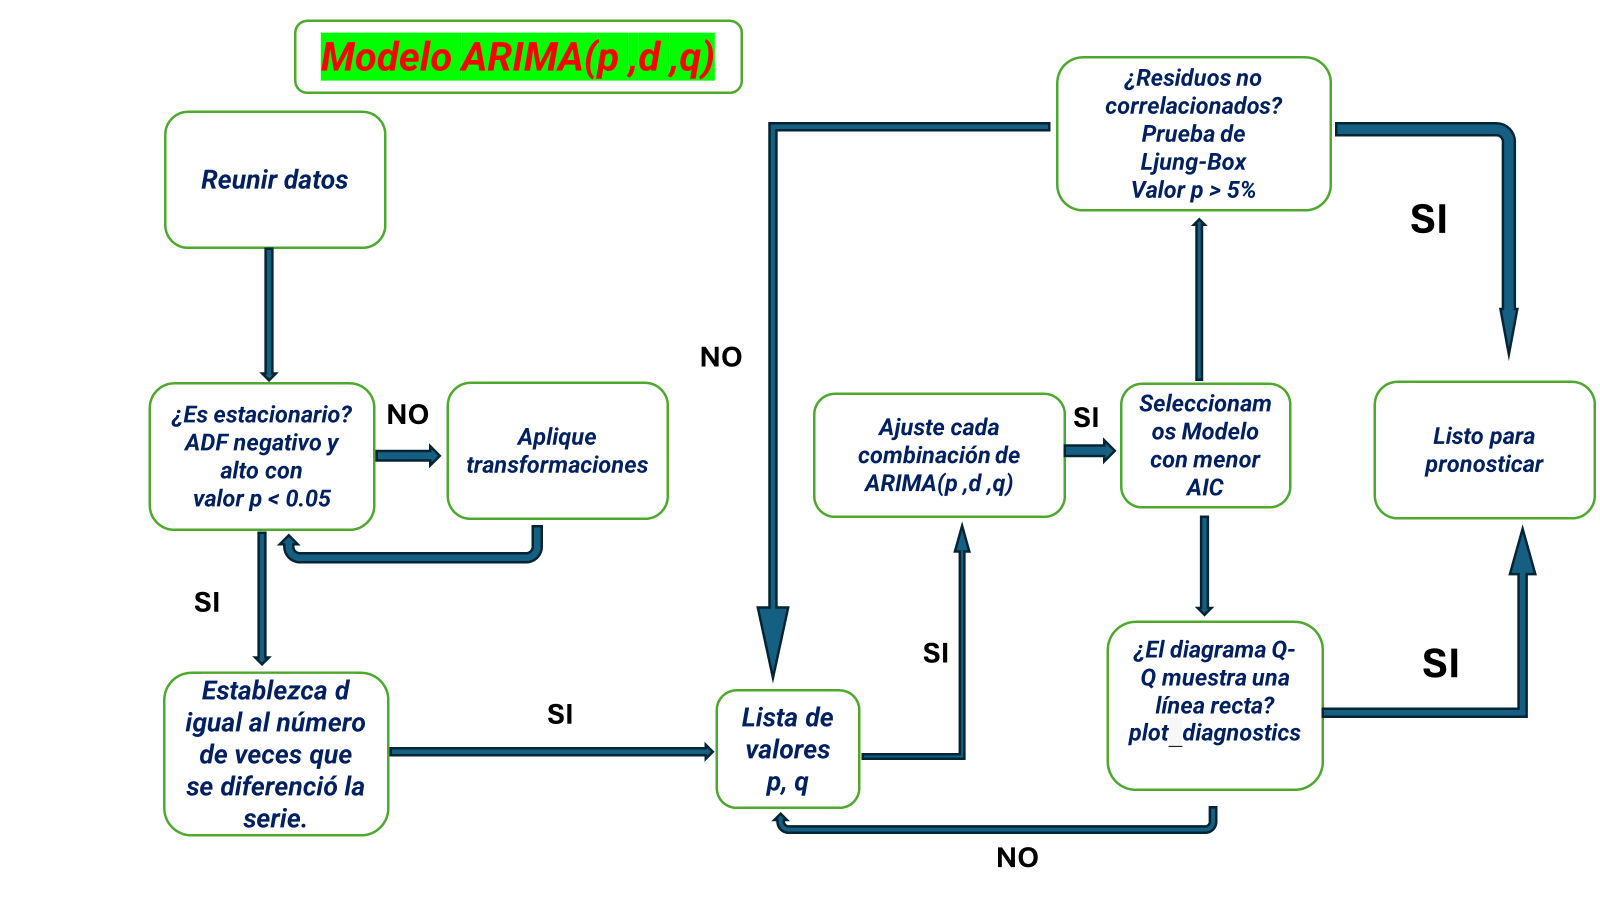

### **Paso 8. Construimos todas las combinaciones de parametros del $SARIMA(p,d,q)(P,D,Q)_m$**

In [ ]:
### **Paso 8. Ajustamos todos los modelos SARIMA y calculamos el AIC**
# Crea una lista para nuestros posibles valores de p y q.
ps = range(0, 12) # Permita que p y q varíen de 0 a 12 para capturar
#información estacional.
qs = range(0, 12)
Ps = [0]
Qs = [0]
# Establezca P y Q en 0, ya que estamos trabajando con un modelo ARIMA(p,d,q).
d = 2
D = 0
# D se establece en 0 porque estamos trabajando con un modelo ARIMA(p,d,q).
s =12

+ **El parámetro s es equivalente a m. Ambos denotan la frecuencia. Así es simplemente cómo se implementa el modelo SARIMA en la biblioteca statsmodels.**

In [ ]:
# lista con todas las combinaciones posibles para p,q,P,Q
order_l = list(itertools.product(ps, qs, Ps, Qs))
order_l

[(0, 0, 0, 0),
 (0, 1, 0, 0),
 (0, 2, 0, 0),
 (0, 3, 0, 0),
 (0, 4, 0, 0),
 (0, 5, 0, 0),
 (0, 6, 0, 0),
 (0, 7, 0, 0),
 (0, 8, 0, 0),
 (0, 9, 0, 0),
 (0, 10, 0, 0),
 (0, 11, 0, 0),
 (1, 0, 0, 0),
 (1, 1, 0, 0),
 (1, 2, 0, 0),
 (1, 3, 0, 0),
 (1, 4, 0, 0),
 (1, 5, 0, 0),
 (1, 6, 0, 0),
 (1, 7, 0, 0),
 (1, 8, 0, 0),
 (1, 9, 0, 0),
 (1, 10, 0, 0),
 (1, 11, 0, 0),
 (2, 0, 0, 0),
 (2, 1, 0, 0),
 (2, 2, 0, 0),
 (2, 3, 0, 0),
 (2, 4, 0, 0),
 (2, 5, 0, 0),
 (2, 6, 0, 0),
 (2, 7, 0, 0),
 (2, 8, 0, 0),
 (2, 9, 0, 0),
 (2, 10, 0, 0),
 (2, 11, 0, 0),
 (3, 0, 0, 0),
 (3, 1, 0, 0),
 (3, 2, 0, 0),
 (3, 3, 0, 0),
 (3, 4, 0, 0),
 (3, 5, 0, 0),
 (3, 6, 0, 0),
 (3, 7, 0, 0),
 (3, 8, 0, 0),
 (3, 9, 0, 0),
 (3, 10, 0, 0),
 (3, 11, 0, 0),
 (4, 0, 0, 0),
 (4, 1, 0, 0),
 (4, 2, 0, 0),
 (4, 3, 0, 0),
 (4, 4, 0, 0),
 (4, 5, 0, 0),
 (4, 6, 0, 0),
 (4, 7, 0, 0),
 (4, 8, 0, 0),
 (4, 9, 0, 0),
 (4, 10, 0, 0),
 (4, 11, 0, 0),
 (5, 0, 0, 0),
 (5, 1, 0, 0),
 (5, 2, 0, 0),
 (5, 3, 0, 0),
 (5, 4, 0, 0),
 (5, 5, 0, 0),


### **Paso 9. El Modelo que nos permitira encontrar los parametros del modelos SARIMA y calcular el AIC**

In [ ]:
import tqdm
def optimize_sarima(
        endog: pd.Series | list, order_l: list,
        d: int, D: int, s:int) -> pd.DataFrame:

    '''
    Dada una lista de combinaciones de p,q, pruebe diferentes combinaciones de órdenes arma
     y compárelas entre sí utilizando el criterio de información de Akaike.

:param endogcoding.Union[pd.Series, list]: el proceso de serie temporal observado
:param order_l list: lista de todas las combinaciones de p y q
:param d int: número de veces que el conjunto de datos debe ser comparado para volverse
estacionario

:returns: marco de datos con dos columnas, una con la combinación de p y q,
la otra con el puntaje AIC, el marco de datos ya está ordenado.
:rtype: pd.DataFrame
    '''

    results = []

    for order in tqdm.tqdm_notebook(order_l):
        try:
            model = sm.tsa.statespace.SARIMAX(
                endog,
                order = (order[0], d, order[1]),
                seasonal_order = (order[2], D, order[3], s),
                simple_differencing = False,
            )
            model = model.fit(disp = False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    # sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by = 'AIC', ascending = True)
    result_df = result_df.reset_index(drop = True)

    return result_df

### **Paso 10. Separación en conjunto de Prueba y de entrenamiento para la serie original**

In [ ]:
## NuestroDataFrame
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
### **Paso 10. Separación en conjunto de Prueba y de entrenamiento para la serie original**

train = df.Passengers[:-12]
test = df.Passengers[-12:]
print('Tamaños')

print(f'Tamaño de nuestra Serie {len(df)}')
print(f'Conjunto de entrenamiento {len(train)}')
print(f'Conjunto de Prueba {len(test)}')
print('En porcentajes')
print(f'Conjunto de entrenamiento {round(len(train)/len(df)*100,1)}')
print(f'Conjunto de Prueba {round(len(test)/len(df)*100,1)}')

Tamaños
Tamaño de nuestra Serie 144
Conjunto de entrenamiento 132
Conjunto de Prueba 12
En porcentajes
Conjunto de entrenamiento 91.7
Conjunto de Prueba 8.3


### **Paso 11. Ajustamos todos los modelos SARIMA y calculamos el AIC**

In [ ]:
# Calculos de (p,d,q)(P,D,Q) y el AIC correpondiente al modelo SARIMA(p,d,q)(P,D,Q)
result_df = optimize_sarima(train, order_l, d, D, s)
result_df

  0%|          | 0/144 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.842652
1,"(11, 4, 0, 0)",1019.034751
2,"(11, 5, 0, 0)",1020.379289
3,"(11, 1, 0, 0)",1021.025922
4,"(11, 7, 0, 0)",1021.662835
...,...,...
139,"(5, 0, 0, 0)",1281.732157
140,"(3, 0, 0, 0)",1300.282335
141,"(2, 0, 0, 0)",1302.913196
142,"(1, 0, 0, 0)",1308.152194


### **Acerca del paso 11 - Conclusiones**
+ Esto devuelve un DataFrame donde el modelo con el AIC más bajo es un modelo $SARIMA(11,2,3)(0,0,0)_12$, que es equivalente a un modelo $ARIMA(11,2,3)$.
+ Como puede ver, permitir que el orden $p$ varíe de $0$ a $12$ fue beneficioso para el modelo, ya que el modelo con el AIC más bajo tiene en cuenta los últimos 11 valores de la serie, ya que
p = 11.
+ Veremos si esto es suficiente para capturar información estacional de la serie y compararemos el rendimiento del modelo ARIMA con el modelo SARIMA en la siguiente sección.
+ Por ahora, nos centraremos en realizar el análisis de residuos. + Podemos ajustar el modelo ARIMA(11,2,3) obtenido anteriormente y graficar los diagnósticos de los residuos.

## **Paso 12. Los residuos se comportan como un ruido blanco - ¿El diagrama Q-Q muestra una línea recta?  - método plot_diagnostics**

In [ ]:
# **Paso 12. Los residuos se comportan como un ruido blanco**
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = sm.tsa.statespace.SARIMAX(
    train,
    order = (11, 2, 3),
    simple_differencing = False,
)
model = model.fit(disp = False)
residuals = model.resid

### **Los residuos son un ruido blanco**
+ Para ello, ajustaremos un modelo ARIMA(3,2,3) al conjunto de entrenamiento y mostraremos los diagnósticos de los residuos utilizando el método plot_diagnostics.
+ **El resultado se muestra en la figura 7.7.**

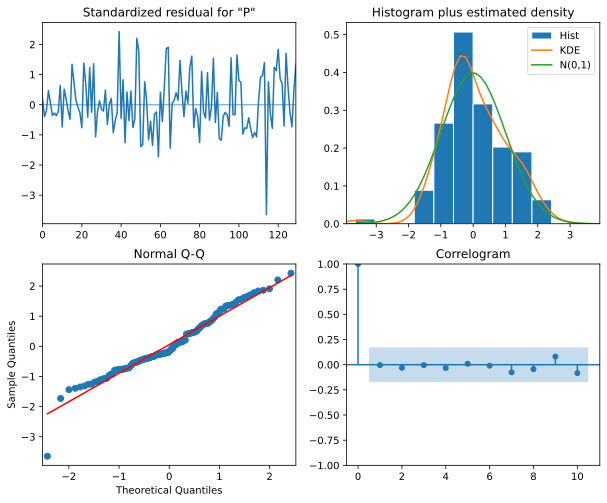

In [ ]:
# **Los residuos son un ruido blanco**
model.plot_diagnostics(figsize=(10, 8));

#### **Conclusiones acerca del Paso 12**
+ **Figura 8.9 Diagnóstico de los residuos del modelo ARIMA(11,2,3). En el gráfico superior izquierdo, los residuos no tienen tendencia con una varianza que parece bastante constante a lo largo del tiempo, lo que se asemeja al comportamiento del ruido blanco.**
+ **El gráfico superior derecho muestra la distribución de los residuos, que se acerca a una distribución normal, a pesar del pico inusual.**
+ **Esto se confirma además mediante el gráfico Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y = x.**
+ **Finalmente, el correlograma en el gráfico inferior derecho no muestra coeficientes de autocorrelación significativos después del retardo 0, que es exactamente como el ruido blanco.**
+ **A partir de este análisis, los residuos se parecen al ruido blanco.**

### **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Nuestro último paso es ejecutar la prueba de **Ljung-Box** para determinar si los residuos están correlacionados.
+ Si los valores p devueltos superan 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos no están correlacionados y se distribuyen de forma independiente, al igual que el ruido blanco.
+ Aplicaremos la prueba en los primeros 10 rezagos y estudiaremos los valores p. Si todos los valores p son mayores que.

In [ ]:
# **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
residuals = model.resid
sm.stats.acorr_ljungbox(residuals, lags = range(1, 11))

,lb_stat,lb_pvalue
1,6.539124,0.010553
2,6.667840,0.035653
3,6.943387,0.073724
4,7.736593,0.101718
5,8.377928,0.136601
6,8.669212,0.193054
7,9.493241,0.219155
8,9.731307,0.284393
9,9.741755,0.371793
10,11.546080,0.316583


#### **Análisis de la prueba Prueba de Ljung-Box**
+ Los valores p devueltos son todos mayores que 0,05, excepto los dos primeros valores.
+ Esto significa que, según la prueba de Ljung-Box, rechazamos la hipótesis nula con un 5 % de probabilidad de ser errónea, ya que fijamos nuestro límite de significancia en 0,05.
+ Sin embargo, a partir del tercer valor todos son mayores que 0,05, por lo que rechazamos la hipótesis nula y concluimos
que los residuos no están correlacionados a partir del retardo 3.
+ Esta es una situación interesante para analizar, porque el análisis gráfico de los residuos nos lleva a concluir que se parecen al ruido blanco, pero la prueba de Ljung-Box apunta a cierta correlación en los retardos 1 y 2.
+ **Esto significa que nuestro modelo ARIMA no está capturando toda la información de los datos.**
+ **En este caso, seguiremos adelante con el modelo, porque sabemos que estamos modelando datos estacionales con un modelo no estacional**.
+ Por lo tanto, la prueba de Ljung-Box nos está diciendo realmente que nuestro modelo no es perfecto, pero eso no es un problema, porque parte de este ejercicio es comparar el desempeño de ARIMA y SARIMA y demostrar que SARIMA es el camino a seguir cuando se trabaja con datos estacionales.
+ ***Como se mencionó anteriormente, deseamos predecir un año completo de pasajeros aéreos mensuales, utilizando los últimos 12 meses de datos como nuestro conjunto de prueba. El modelo de referencia es el pronóstico estacional ingenuo, donde simplemente usamos el número de pasajeros aéreos para cada mes de 1959 como pronóstico para cada mes de 1960.***

### **Paso 14. Haga pronósticos sobre el conjunto de prueba. Utilice un método ingenuo y un modelo ARIMA(11,2,3)**

In [ ]:
#### **a. Nuestra data**
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#### **b. Nuestro conjunto de prueba**
test = df.iloc[-12:] # Crea el conjunto de prueba. Corresponde a los últimos 12 puntos de datos, que son los datos de 1960.

In [ ]:
### **c. El pronóstico estacional ingenuo simplemente reutiliza los datos de 1959 como pronóstico para 1960.**
test['naive_seasonal'] = df['Passengers'].iloc[120:132].values

In [ ]:
arima_pred = model.get_prediction(132, 143).predicted_mean
test['arima_pred'] = arima_pred

In [ ]:
test

,Month,Passengers,naive_seasonal,arima_pred
132,1960-01,417,360,422.423451
133,1960-02,391,342,410.712068
134,1960-03,419,406,461.932587
135,1960-04,461,396,457.887529
136,1960-05,472,420,481.783456
137,1960-06,535,472,531.225222
138,1960-07,622,548,606.187559
139,1960-08,606,559,615.417675
140,1960-09,508,463,525.453898
141,1960-10,461,407,467.066240


### **Pronóstico estacional ingenuo para comparar**
+ El pronóstico estacional ingenuo se implementa seleccionando los datos correspondientes a los últimos 12 meses del set train

### **Paso 15. Mida el MSE e identifique su modelo campeón.**
+ Ahora mediremos el error cuadrático medio (MSE) para evaluar el rendimiento de cada modelo.

In [ ]:
# **Paso 15. Mida el MSE e identifique su modelo campeón.**
from sklearn.metrics import mean_squared_error

mse_naive_seasonal = mean_squared_error(test['naive_seasonal'], test['Passengers'])
mse_ARIMA = mean_squared_error(test['arima_pred'], test['Passengers'])


print('El MSE  con los diferentes metodos ingenuos y ARIMA(11,2,3)')
print(f'El Error MSE con la media historica es {round(mse_naive_seasonal,2)}')


print(f'El Error MSE con la ARIMA(11,2,3) es {round(mse_ARIMA,2)}')

El MSE  con los diferentes metodos ingenuos y ARIMA(11,2,3)
El Error MSE con la media historica es 2571.33
El Error MSE con la ARIMA(11,2,3) es 461.8


#### **Paso 16. Dibuje sus MSE en un gráfico de barras.**

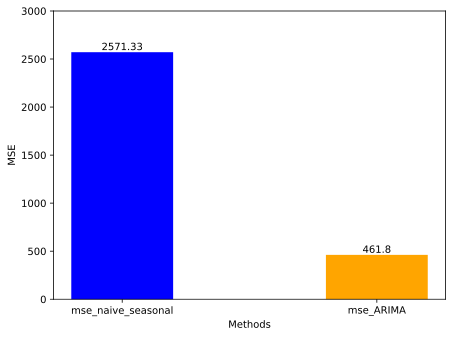

In [ ]:
## **Paso 19. Dibuje sus MSE en un gráfico de barras.**
import matplotlib.pyplot as plt

# Datos
x = ['mse_naive_seasonal', 'mse_ARIMA']
y = [mse_naive_seasonal, mse_ARIMA]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue',  'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 3000)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


#### **Conclusiones Acerca del MSE**

+ En la figura, puede ver que el MSE para el pronóstico estacional ingenuo es del 2571.33, mientras que el MSE para el modelo ARIMA(11,2,3) es del 461.8, que es muy pequeño con respecto al valor de referencia.
+ Esto significa que el modelo ARIMA(11,2,3) es claramente un modelo mejor que el método estacional ingenuo.

## **Paso 17. Dibuje el pronostico con ARIMA(11,2,3)**

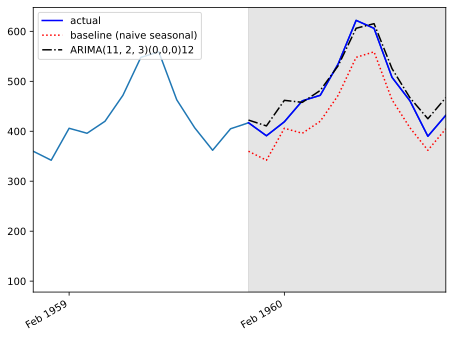

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.Passengers)
ax.plot(test.Passengers, 'b', label = 'actual')
ax.plot(test.naive_seasonal, 'r:', label = 'baseline (naive seasonal)')
ax.plot(test.arima_pred, 'k-.', label = 'ARIMA(11, 2, 3)(0,0,0)12')

ax.legend(loc = 2)

ax.axvspan(132, 143, color='#808080', alpha = 0.2)

ax.set_xlim(120, 143)


plt.xticks(
    [122, 134],
    ['Feb 1959', 'Feb 1960'],
)

fig.autofmt_xdate()
plt.tight_layout()

### **Paso 18. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**
+ Podemos medir el error absoluto medio (MAE) de las predicciones ARMA(2,2) indiferenciadas para entender qué tan lejos están las predicciones de los valores reales.
+ Usaremos el MAE simplemente porque es fácil de interpretar.

In [ ]:
## **Paso 18. Obtenga el Error absoluto medio (MAE)**
from sklearn.metrics import mean_absolute_error

mae_naive_seasonal = sklearn.metrics.mean_absolute_error(test.Passengers, test.naive_seasonal)
mae_arima_pred = sklearn.metrics.mean_absolute_error(test.Passengers, test.arima_pred)

print(f'MAE con método ingenuo = {mae_naive_seasonal}')
print(f'MAE con método ARIMA(11,2,3) = {mae_arima_pred} ')

MAE con método ingenuo = 47.833333333333336
MAE con método ARIMA(11,2,3) = 16.9936241841193 


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal'])
mape_arima = mape(test['Passengers'], test['arima_pred'])

print(f'MAPE con método ingenuo = {mape_naive_seasonal} % ')
print(f'MAPE con método ARIMA(11,2,3) = {mape_arima} % ')

MAPE con método ingenuo = 9.987532920823485 % 
MAPE con método ARIMA(11,2,3) = 3.839049143698555 % 


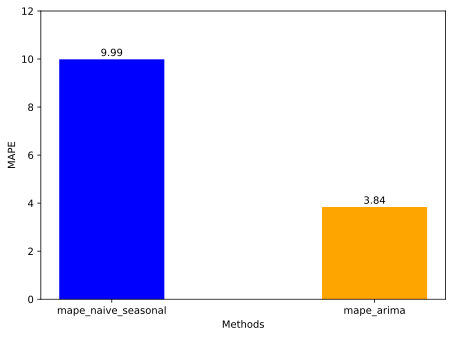

In [ ]:
## **Paso 19. Dibuje sus MSE en un gráfico de barras.**
import matplotlib.pyplot as plt

# Datos
x = ['mape_naive_seasonal', 'mape_arima']
y = [mape_naive_seasonal, mape_arima]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue',  'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MAPE')
ax.set_ylim(0, 12)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


#### **Interpretacion del MAPE**
+ En la figura 7.9, puede ver que el MAPE para el pronóstico estacional ingenuo es del 10 %, mientras que el MAPE para el modelo ARIMA(11,2,3) es del 3.8%.
+ El modelo ARIMA(11,2,3) es claramente un modelo mejor que el método estacional ingenuo.

# **8.3.2. Pronóstico con un modelo $SARIMA(p,d,q)(P,D,Q)_m$**
+ En la sección anterior, utilizamos un modelo ARIMA(11,2,3) para pronosticar la cantidad de pasajeros aéreos mensuales.
+ Ahora ajustaremos un modelo SARIMA y veremos si funciona mejor que el modelo ARIMA.
+ Con suerte, el modelo SARIMA funcionará mejor, ya que puede capturar información estacional y sabemos que nuestro conjunto de datos exhibe una estacionalidad clara.
+ Siguiendo los pasos de nuestro procedimiento de modelado general (figura 8.11), primero verificaremos la estacionariedad y aplicaremos las transformaciones necesarias.

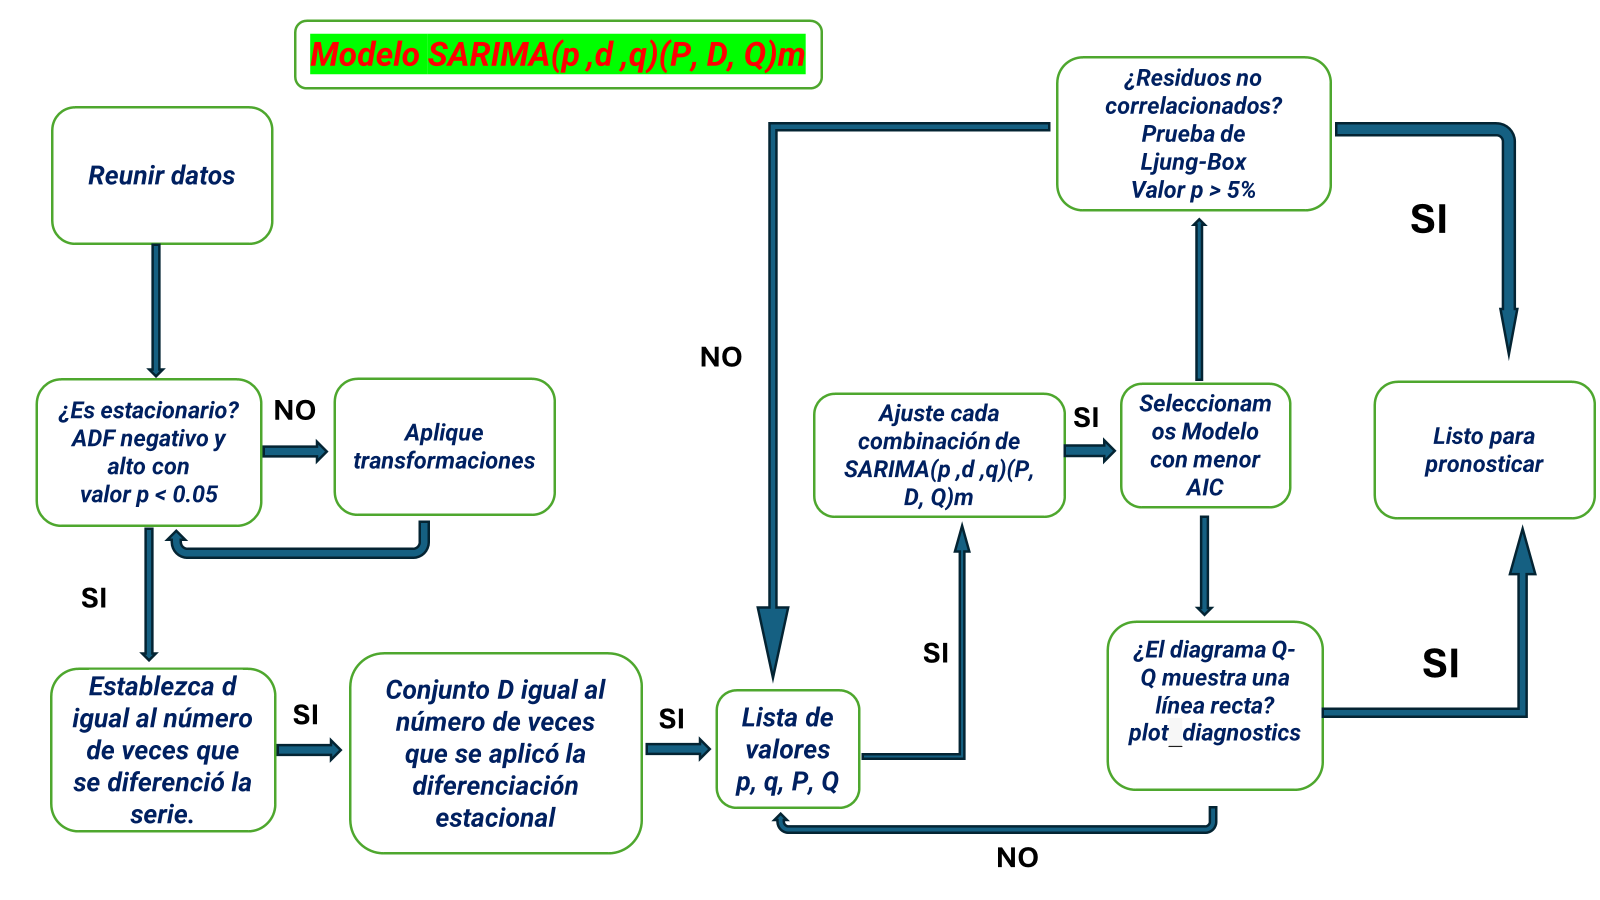

#### **Paso 19. Implementando SARIMA - Probaremos nuevamente la estacionariedad**

### **a. Prueba de estacionariedad - Serie Original**

In [ ]:
### **a. Prueba de estacionariedad - Serie Original**
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df.Passengers)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={ADF_result[1]} es menor a 0.05')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = 0.8153688792060498 es negativo y
Si valor p =0.991880243437641 es menor a 0.05


+ **La prueba ADF sobre el conjunto de datos arroja un estadístico ADF de 0,82 y un valor p de 0,99. Por lo tanto, no podemos rechazar la hipótesis nula y la serie no es estacionaria. Podemos aplicar una diferenciación de primer orden y probar la estacionariedad.**

### **b. Prueba de estacionariedad -Serie diferenciada**

In [ ]:
### **b. Prueba de estacionariedad -Serie diferenciada**
passengers_diff = np.diff(df['Passengers'], n=1)
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(passengers_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={ADF_result[1]} es menor a 0.05')

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -2.8292668241700047 es negativo y
Si valor p =0.05421329028382478 es menor a 0.05


+ **Esto devuelve un estadístico ADF de -2,83 y un valor p de 0,054. Dado que el valor p es mayor que 0,05, no podemos rechazar la hipótesis nula y la serie sigue siendo no estacionaria. Por lo tanto, apliquemos una diferencia estacional y probemos la estacionariedad.**

### **c. Prueba de estacionariedad -Serie diferenciada - 12 veces**

In [ ]:
### **c. Prueba de estacionariedad -Serie diferenciada - 12 veces**
passengers_diff_seasonal_diff = np.diff(passengers_diff, n = 12)
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(passengers_diff_seasonal_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={ADF_result[1]} es menor a 0.05')

ADF Statistic: -17.62486236026156
p-value: 3.823046855601547e-30
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -17.62486236026156 es negativo y
Si valor p =3.823046855601547e-30 es menor a 0.05


+ **Diferencia estacional. Dado que tenemos datos mensuales, m = 12, la diferencia estacional es la diferencia entre dos valores que están separados por 12 intervalos de tiempo.**

### **Conclusion acerca de los parametros de Difereciabilidad $(d,D)$**
+ Ahora podemos rechazar la hipótesis nula, lo que significa que, $d = 1$ ya que hicimos solo una ronda de diff, y $D = 1$ ya que hicimos una ronda de diff estacional además de eso.

### **Paso 20. Implementando SARIMA - Ajustamos todos los modelos SARIMA y calculamos el AIC**

### **a. Creamos la lista de todos los parametros (p,d,q)(P,D,Q) y m=s**

In [ ]:
### **a. Creamos la lista de todos los parametros (p,d,q)(P,D,Q) y m=s**
# Crea una lista para nuestros posibles valores de p y q.
ps = range(0, 4) # Permita que p y q varíen de 0 a 12 para capturar
#información estacional.
qs = range(0, 4)
Ps = range(0, 4)
Qs = range(0, 4)
# Establezca P y Q en 0, ya que estamos trabajando con un modelo ARIMA(p,d,q).
d = 1
D = 1
# D se establece en 0 porque estamos trabajando con un modelo ARIMA(p,d,q).
s =12

### **b. lista con todas las combinaciones posibles para p,q,P,Q**

In [ ]:
### **b. lista con todas las combinaciones posibles para p,q,P,Q**
order_l = list(itertools.product(ps, qs, Ps, Qs))

###. **c. Evaluamos todos los modelos $SARIMA(p,d,q)(P,D,Q)_m$ con el AIC**

In [ ]:
###. **c. Evaluamos todos los modelos SARIMA(p,d,q)(P,D,Q)m con el AIC**
train = df.Passengers[:-12]
arima_result = optimize_sarima(train, order_l, d, D, s)

  0%|          | 0/256 [00:00<?, ?it/s]

In [ ]:
arima_result

,"(p,q,P,Q)",AIC
0,"(2, 1, 1, 2)",892.240189
1,"(2, 1, 1, 3)",894.110325
2,"(1, 0, 1, 2)",894.285656
3,"(0, 1, 1, 2)",894.991643
4,"(1, 0, 2, 1)",895.092629
...,...,...
251,"(0, 0, 2, 0)",906.940147
252,"(3, 2, 0, 3)",907.181875
253,"(0, 0, 3, 2)",907.603099
254,"(0, 0, 3, 0)",908.742583


+ **c. Evaluamos todos los modelos $SARIMA(p,d,q)(P,D,Q)_m$ con el AIC**
+ El modelo con el menor AIC es $$SARIMA(p,d,q)(P,D,Q)_m = SARIMA(2,1,1)(1,1,2)_{12}$$

### **Paso 21. Análisis de los Residuos para el modelo $SARIMA(2,1,1)(1,1,2)_{12}$ - método plot_diagnostics**.

In [ ]:
model = sm.tsa.statespace.SARIMAX(
    train,
    order = (2, 1, 1),
    seasonal_order = (1, 1, 2, 12),
    simple_differencing = False,
)
model = model.fit(disp = False)
residuals = model.resid

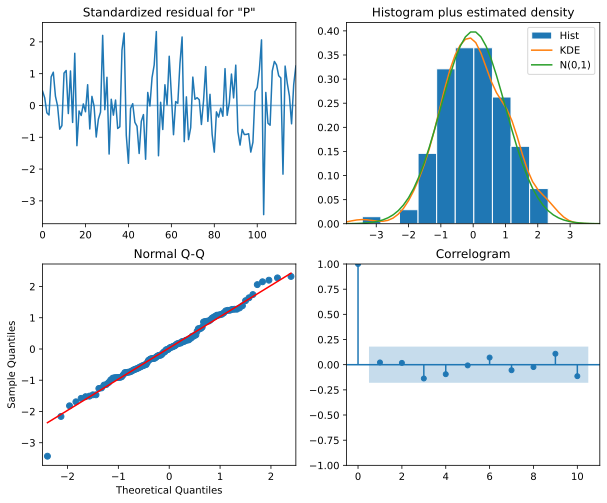

In [ ]:
model.plot_diagnostics(figsize = (10, 8))
plt.show()

#### **Conclusiones acerca del Paso 21**
+ **Diagnóstico de los residuos del modelo $SARIMA(2,1,1)(1,1,2)_{12}$. En el gráfico superior izquierdo, los residuos no tienen tendencia con una varianza que parece bastante constante a lo largo del tiempo, lo que se asemeja al comportamiento del ruido blanco.**
+ **El gráfico superior derecho muestra la distribución de los residuos, que se acerca a una distribución normal, a pesar del pico inusual.**
+ **Esto se confirma además mediante el gráfico Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y = x.**
+ **Finalmente, el correlograma en el gráfico inferior derecho no muestra coeficientes de autocorrelación significativos después del retardo 0, que es exactamente como el ruido blanco.**
+ **A partir de este análisis, los residuos se parecen al ruido blanco.**

### **Paso 22. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Nuestro último paso es ejecutar la prueba de **Ljung-Box** para determinar si los residuos están correlacionados.
+ Si los valores p devueltos superan 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos no están correlacionados y se distribuyen de forma independiente, al igual que el ruido blanco.
+ Aplicaremos la prueba en los primeros 10 rezagos y estudiaremos los valores p. Si todos los valores p son mayores que.

In [ ]:
### **Prueba de Ljung - Box para los residuos con el modelo $SARIMA(2,1,1)(1,1,2)_{12}$
sm.stats.acorr_ljungbox(residuals, lags = range(1, 11))

,lb_stat,lb_pvalue
1,0.004663,0.945557
2,0.744726,0.689104
3,1.019752,0.796473
4,1.226798,0.873667
5,1.437233,0.920197
6,1.711221,0.944252
7,2.306318,0.940962
8,2.720695,0.950645
9,2.737284,0.973807
10,4.976578,0.892737


#### **Análisis de la prueba Prueba de Ljung-Box**
+ **Los valores p devueltos son todos mayores que 0,05, por lo que rechazamos la hipótesis nula y concluimos que los residuos no están correlacionados**

### **Paso 23. Haga pronósticos sobre el conjunto de prueba. Utilice un método ingenuo y un modelo $SARIMA(2,1,1)(1,1,2)_{12}$**

In [ ]:
sarima_pred = model.get_prediction(132, 143).predicted_mean
test['sarima_pred'] = sarima_pred

In [ ]:
test

,Month,Passengers,naive_seasonal,arima_pred,sarima_pred
132,1960-01,417,360,422.423451,418.524884
133,1960-02,391,342,410.712068,399.567753
134,1960-03,419,406,461.932587,461.302182
135,1960-04,461,396,457.887529,451.428644
136,1960-05,472,420,481.783456,473.719243
137,1960-06,535,472,531.225222,538.771197
138,1960-07,622,548,606.187559,612.413497
139,1960-08,606,559,615.417675,624.570118
140,1960-09,508,463,525.453898,520.148531
141,1960-10,461,407,467.066240,462.829156


### **Paso 24. Construya los graficos de predicción para los tres métos: Ingenuo, $ARIMA(11,2,3)$ y $SARIMA(2,1,1)(1,1,2)_{12}$**

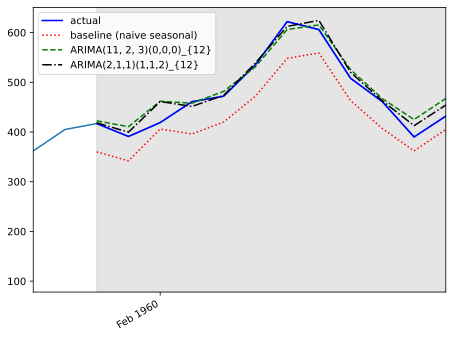

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.Passengers)
ax.plot(test.Passengers, 'b', label = 'actual')
ax.plot(test.naive_seasonal, 'r:', label = 'baseline (naive seasonal)')
ax.plot(test.arima_pred, 'g--', label = 'ARIMA(11, 2, 3)(0,0,0)_{12}')
ax.plot(test.sarima_pred, 'k-.', label = 'ARIMA(2,1,1)(1,1,2)_{12}')


ax.legend(loc = 2)

ax.axvspan(132, 143, color='#808080', alpha = 0.2)

ax.set_xlim(130, 143)


plt.xticks(
    [134],
    ['Feb 1960'],
)

fig.autofmt_xdate()
plt.tight_layout()

+ **El gráfico se muestra en la figura 8.13. Las líneas de los modelos ARIMA y SARIMA se ubican casi sobre los datos observados, lo que significa que las predicciones son muy cercanas a los datos observados.**

### **Paso 25. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal'])
mape_arima = mape(test['Passengers'], test['arima_pred'])
mape_sarima = mape(test['Passengers'], test['sarima_pred'])

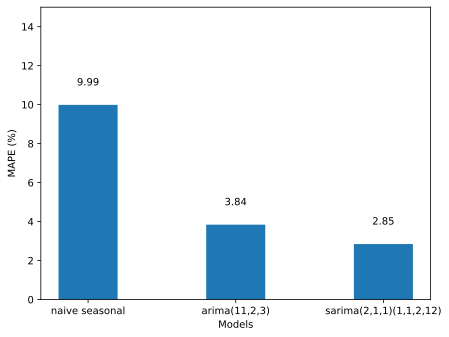

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'arima(11,2,3)', 'sarima(2,1,1)(1,1,2,12)']
y = [mape_naive_seasonal, mape_arima, mape_sarima]


ax.bar(x, y, width = 0.4)

ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(
        x = index, y = value + 1, s = str(round(value,2)), ha = 'center'
    )

plt.tight_layout()

+ **En la figura se puede ver que nuestra línea base alcanza un MAPE del 9,99 %.**
+ El modelo ARIMA produjo pronósticos con un MAPE del 3,85 % y el modelo SARIMA obtuvo un MAPE del 2,85 %.
+ Un MAPE cercano a 0 es indicativo de mejores predicciones, por lo que el modelo SARIMA es el método con mejor rendimiento para esta situación.
+ Esto tiene sentido, ya que nuestro conjunto de datos tenía una estacionalidad clara y el modelo SARIMA está diseñado para utilizar las propiedades estacionales de las series temporales para realizar pronósticos.